In [85]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [86]:
train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [87]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaler = sc.fit_transform(training_set)

In [88]:
X_train = []
y_train = []
for i in range(60, 1258):
  X_train.append(training_set_scaler[i-60:i, 0])
  y_train.append(training_set_scaler[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [89]:
# Reshaping 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

In [90]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

In [91]:
regressor = Sequential()

In [92]:
# ADD ONE LAYER OF LSTM layer and some Dropout regularisation. 
# Units means neurons for numbers Memory units. 
# return_sequences equal to true since we will have to add another LSTM layer stacked together. 
# This is many to one architecture. Since we have many stock indicator but we need to predict one thing. invest or not.
regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding second layer, we need to modify input_shape no need for it.
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding third layer 
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding fourth layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [93]:
# Final layer : Output layer. We need fully connected layer which Dense Class.
regressor.add(Dense(units = 1))

In [94]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [95]:
# Fitting the RNN above architecture to training set.
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 16s 162ms/step - loss: 0.0473
Epoch 2/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0072
Epoch 3/100
38/38 [==============================] - 6s 163ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 7s 195ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 6s 156ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 6s 171ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0045
Epoch 12/100
38/38 [==============================] - 7s 173ms/step - loss: 0.0040
Epoch 13/100

In [103]:
# Making the predictions and Visualising the result. 
# Getting the real stock price of 2017
test_set = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock = test_set.iloc[:, 1:2].values

In [104]:
test_set.head(4)

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"


In [105]:
# Getting the predicted stock price of 2017
dataset_tot = pd.concat((train['Open'], test_set['Open']), axis = 0)
inputs = dataset_tot[len(dataset_tot) - len(test_set)-60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.fit_transform(inputs)

In [106]:
X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predictions = regressor.predict(X_test)
predictions = sc.inverse_transform(predictions)

1/1 [==============================] - 0s 67ms/step


In [107]:
# Visualising the results
predictions

array([[787.1367 ],
       [784.5239 ],
       [783.0642 ],
       [783.0645 ],
       [785.32367],
       [790.84393],
       [797.8424 ],
       [802.81354],
       [805.08405],
       [805.4604 ],
       [804.905  ],
       [803.99493],
       [803.1424 ],
       [802.98096],
       [803.56244],
       [807.4039 ],
       [814.6601 ],
       [823.5582 ],
       [829.12695],
       [826.2405 ]], dtype=float32)

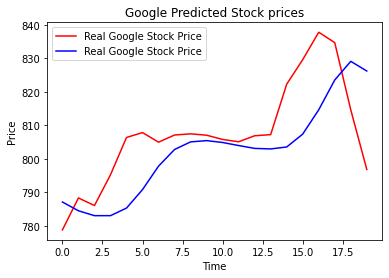

In [108]:
plt.plot(real_stock, color = 'red', label = 'Real Google Stock Price')
plt.plot(predictions, color = 'blue', label = 'Real Google Stock Price')
plt.title("Google Predicted Stock prices")
plt.xlabel("Time")
plt.ylabel('Price')
plt.legend()